# High resolution simulation of the South Asian monsoon using a variable resolution global climate model
P Sabin, T.
Krishnan, R.
Ghattas, Josefine
Denvil, Sebastien
Dufresne, Jean Louis
Hourdin, Frederic
Pascal, Terray  

-> Try to reproduce some results with CMIP6

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
from scipy import stats

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

3.7.5 (default, Oct 25 2019, 15:51:11) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 133 GB / percent used: 47.0 %


## Figure 2: Precipitation (JJAS)

In [2]:
# Get data
pr = u.get_data_IPSL_CM6A_LR_historical('pr', period=slice('1979','2008'))
pr

<xarray.DataArray 'pr' (realization: 32, time: 360, lat: 143, lon: 144)>
array([[[[4.55437686e-07, 4.55437686e-07, 4.55437686e-07, ...,
          4.55437686e-07, 4.55437686e-07, 4.55437686e-07],
         [5.55253450e-07, 5.78590857e-07, 5.44074396e-07, ...,
          6.50771028e-07, 5.88731382e-07, 6.10677489e-07],
         [3.60477458e-07, 4.01139090e-07, 4.42436487e-07, ...,
          3.62481842e-07, 3.74751608e-07, 4.16685168e-07],
         ...,
         [5.86758597e-06, 5.65147548e-06, 5.96278642e-06, ...,
          6.19308867e-06, 6.35088145e-06, 6.69206884e-06],
         [7.56887948e-06, 7.52292362e-06, 7.26455301e-06, ...,
          6.94157779e-06, 7.12696328e-06, 7.46969135e-06],
         [1.84907367e-06, 1.84907367e-06, 1.84907367e-06, ...,
          1.84907367e-06, 1.84907367e-06, 1.84907367e-06]],

        [[6.64118204e-07, 6.64118204e-07, 6.64118204e-07, ...,
          6.64118204e-07, 6.64118204e-07, 6.64118204e-07],
         [9.74919885e-07, 9.19134891e-07, 8.93638230e-07,

In [55]:
u.check_virtual_memory()

Virtual memory usage - total: 252 GB / available: 157 GB / percent used: 37.4 %


In [4]:
# Compute ensemble mean
pr_ens_avg = pr.mean('realization', keep_attrs=True)
pr_ens_avg

<xarray.DataArray 'pr' (time: 360, lat: 143, lon: 144)>
array([[[6.90216780e-07, 6.90216780e-07, 6.90216780e-07, ...,
         6.90216780e-07, 6.90216780e-07, 6.90216780e-07],
        [1.35435664e-06, 1.33332787e-06, 1.33206083e-06, ...,
         1.38882615e-06, 1.35161531e-06, 1.43501563e-06],
        [1.06590142e-06, 1.05479114e-06, 1.07117648e-06, ...,
         1.07927997e-06, 1.08829568e-06, 1.14932209e-06],
        ...,
        [7.94773950e-06, 7.85919747e-06, 7.82340703e-06, ...,
         6.43090561e-06, 6.48567357e-06, 6.82410428e-06],
        [7.03760088e-06, 6.89775425e-06, 6.91285868e-06, ...,
         6.45537875e-06, 6.60705655e-06, 6.72830629e-06],
        [2.33265928e-06, 2.33265928e-06, 2.33265928e-06, ...,
         2.33265928e-06, 2.33265928e-06, 2.33265928e-06]],

       [[1.08020083e-06, 1.08020083e-06, 1.08020083e-06, ...,
         1.08020083e-06, 1.08020083e-06, 1.08020083e-06],
        [2.14402667e-06, 2.11268684e-06, 2.04869571e-06, ...,
         2.20951028e-06, 2.

In [5]:
# Save ensemble mean
pr_ens_avg.to_netcdf('pr_ens_avg_1979-2008.nc')

In [2]:
# Load ensemble mean
pr_ens_avg = xr.open_dataarray('pr_ens_avg_1979-2008.nc')

In [4]:
# Compute JJAS climatogy
clim_JJAS = u.custom_season_clim(pr_ens_avg, calendar=pr_ens_avg.time.encoding['calendar'], season='JJAS')
clim_JJAS

<xarray.DataArray (lat: 143, lon: 144)>
array([[1.00317526e-06, 1.00317526e-06, 1.00317526e-06, ...,
        1.00317526e-06, 1.00317526e-06, 1.00317526e-06],
       [1.94839063e-06, 1.85286131e-06, 1.81673115e-06, ...,
        1.94892333e-06, 1.95559957e-06, 2.02831758e-06],
       [1.59059349e-06, 1.51836694e-06, 1.48875777e-06, ...,
        1.61500741e-06, 1.58986333e-06, 1.62639618e-06],
       ...,
       [1.18087616e-05, 1.20144234e-05, 1.23291644e-05, ...,
        1.11489055e-05, 1.09503173e-05, 1.09656344e-05],
       [1.20502601e-05, 1.20230505e-05, 1.20069928e-05, ...,
        1.16372596e-05, 1.17885061e-05, 1.19464077e-05],
       [5.05811426e-06, 5.05811426e-06, 5.05811426e-06, ...,
        5.05811426e-06, 5.05811426e-06, 5.05811426e-06]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    season   <U4 'JJAS'
Attributes:
    long_name:           Precipita

In [5]:
# Convert units: kg m-2 s-1 to mm/day
with xr.set_options(keep_attrs=True):
    clim_JJAS *= 86400

clim_JJAS.attrs['units'] = 'mm/day'

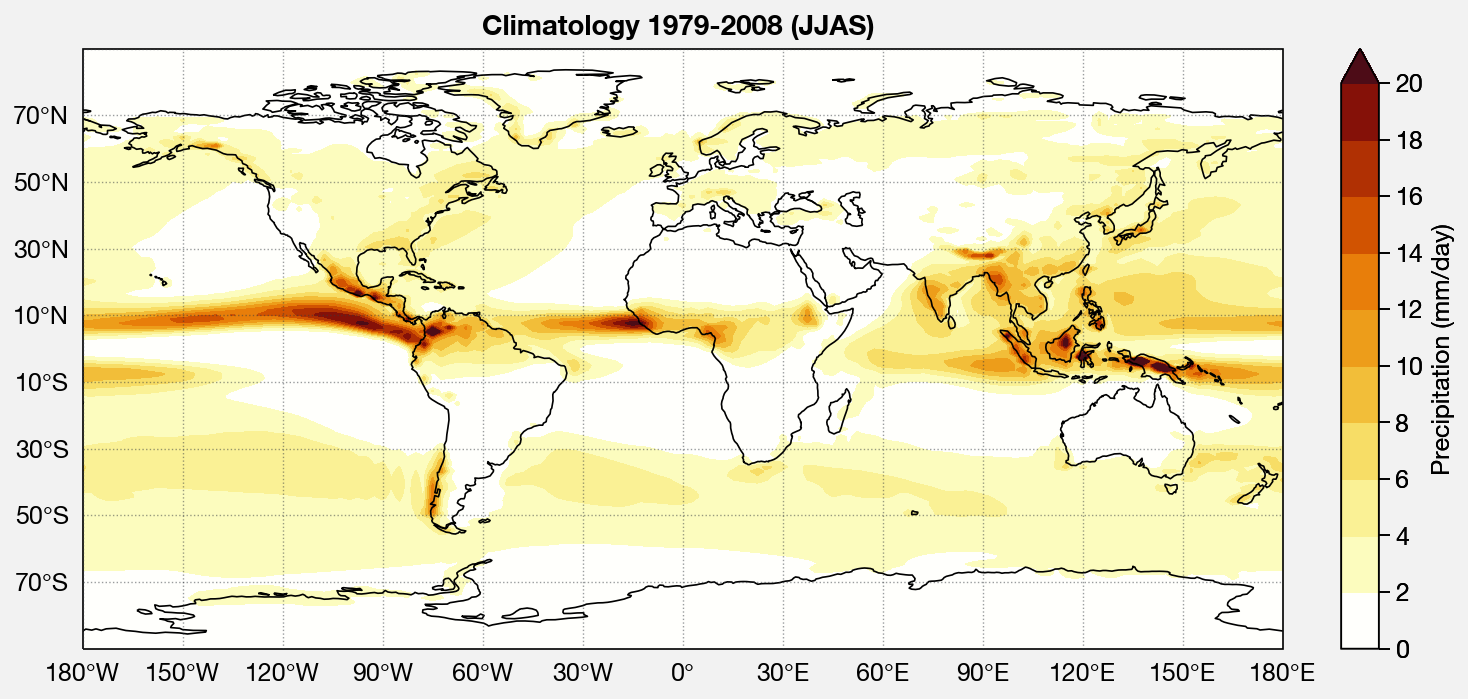

In [10]:
# Plot it
f, axs = plot.subplots(proj='cyl', axwidth=6)

m = axs[0].contourf(clim_JJAS, levels=plot.arange(0,20,2), globe=True, extend='max', 
                    cmap='Orange5'
                   )

f.colorbar(m, label='Precipitation (mm/day)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, coast=True,
    title='', suptitle='Climatology 1979-2008 (JJAS) '
)

## Figure 3: Mean winds at 850 hPa (JJAS)

In [ ]:
# Get data
ua = u.get_data_IPSL_CM6A_LR_historical('ua', period=slice('1979','2008'))
ua